# 서울시 전기차 충전소 충전량 데이터를 활용한 충전종료시각 예측

각 columns의 의미
- 충전구분: 급속, 완속
- 충전소명: 다수
- 주소: 경기도 과천, 하남 및 서울 특별시
    + 특이사항 : 서울특별시 null...
- 충전기용량: 7, 50, 100
    + 완속(3-7kW) / 급속(50kW-100kW)
- 충전량: 0.01 - 84.66
- 충전시간: 0 - 670, 66438?
    + 특이사항: 66438의 의미
- 충전분: 0 - 59
- 충전시작시각:
    + 2022년: 1-3월
    + 2021년: 1-12월
    + ~2020년: 12월~
- 충전종료시각:
    + 2022년: 1-3월
    + 2021년: 1-12월

## 목표
1. ~충전량 예측~ or 충전종료시각 예측
    - ~충전량 예측을 통해 어떤 인사이트를 얻을 것인지~
    - 충전종료시각을 예측할 수 있다면 주차장 밖에 있는 차량의 대기시간을 줄일 수 있을 것이며 효율적으로 차량 유동흐름을 조절할 수 있을 것임

## 생각
- ~충전구분 0 and 1~
    + ~완속0 / 급속1~
- 충전소명
    + ~충전소명 라벨~
    + folium으로 시각화하기 전에 위 경도 좌표 구하기
- ~주소는 null인 행들 제거~
    + ~경기도 제거~
    + folium으로 시각화하기 전에 위 경도 좌표 구하기
    + ~주소 별로 라벨~
- 충전기용량은 완속(3-7kW) / 급속(50kW-)으로 100kW도 있기 때문에 삭제하지말고 넣을 예정
    + ~충전기 용량 3가지 라벨~
- ~충전량~
    + ~0.001, 0.003, 0.007은 3건, 너무 적게 충전된 값이므로 outlier로 취급하여 삭제  예정~
    + ~충전량 133.1 / 충전시간 71 삭제 예정~
    + ~충전량 16787 / 충전시간 1 삭제 예정~
    + 충전량 101.4 / 충전시간 15 삭제 예정
    + ~충전량 6308.04 / 충전시간 0 삭제 예정~
    + ~충전량 161.37 / 충전시간 138 삭제 예정~
    + ~충전량 16787.54~
    + ~**충전량 - 100 = 원래 남아있는 배터리량?**~

- ~충전시간 및 충전분~
    + 완속
        - 완속은 완전 방전에서 완전충전까지 4-5시간 소요
        - 완속 충전 구역에서 법적으로 최대 14시간까지 주차 가능하여 **[14시간]**을 넘어서는 값은 지울 예정
            + 총 4423개

    + 급속
        - 급속은 80% 충전까지 약 1시간
        - 급속은 완전충전까지 1시간 이상 2시간 이하 소요
        - 급속 충전 구역은 법적으로 최대 1시간까지 주차 가능하여 **[1시간]**을 넘어서는 값은 지울 예정 -> **2시간 이상으로 기준 변경**
            + 0시간 - 1시간 59분 이하 총 291,956개
            + 0시간 0분 삭제 예정 총 3813개
            + 2시간 - 2시간 59분 이하 10,481개
            + 2시간 이상 13669개
    + 충전하다가 갑자기 급히 가야하는 경우나 90%이상 많이 충전되어 있지만 다시 충전하러 온 경우는 충전량이 작을 수 있기 때문에 지워서는 안됨

- ~충전시작시각~
    + ~충전종료시각에는 2020년 데이터가 없으므로 충전시작시각의 2020년 제외할 예정~
    + ~datatime으로 년, 월, 일, 시:분 의 형태로 나눈다.~

- ~충전종료시각~
    + y 값으로 사용
    + ~충전시작시각과는 다르게 시:분으로만 나눠서 y값으로 사용한다.~

## 인사이트

주기성을 보이는지
- 직장인 장거리 단거리
- 장보는 시간과 비례하는지
- **배터리 충전 유형 패턴 분석** -> 중요

권장 충전 가이드
- 20-89사이를 충전하라고 권장, 근데 모두 다 그렇지 않다는것

패턴을 고려하지 않고 다 학습하면 성능이 좋지 않을듯
- 패턴별로 모델링시도?

일단 서울 예측
- 지역별로 예측
    + 제주도는 전기차 충전소가 많음. 시행사업일환


충전소를 군집화해서 어떤 패턴을 찾기??
- 충전소의 위치를 분류하는것


사람들이 급속과 완속의 비율을 어떻게 두고 쓰는지 패턴 찾기
- 심야 완속은 할인 / 피크 시간엔 비쌈
    + 싼 시간대는 늘리고 비싼 시간대는 줄이고
- 겨울에는 배터리가 빨리 닳아서 자주 충전함.
    + 평소에는 20%에서 80%까지 20분 걸리나 겨울에는 40분 걸림. (이유는 저항이 높아져서)
    + 배터리 온도가 낮으면 충전이 느림
    + **특성을 타지않는 4월-9월까지 데이터를 쓰면?**
    + **추운날 충전량과 충전시작시각, 충전종료시각을 확인해보면 패턴이 있을듯!**
- 급속충전은 모든 시간대가 가격이 동일
- 완속충전은 시간대 별로 가격이 다름

제일 먼저
- 시간대를 가지고 충전량을 비교해보기

## 순서 정리
1. 일단 모델을 돌려보고 정확도가 얼마나 나오는지 확인
2. 인사이트대로 패턴이 있는 데이터를 분류해서 모델에 넣고 정확도를 확인
3. 1번과 2번을 비교해서 2번에서 이야기한 패턴 때문에 정확도가 유의미한 영향을 받았는지 확인.

## 참고
- [전기차 충전시간 계산](https://kes.go.kr/web/lay1/program/S1T171C180/ES/elctyvhcleElctySafe/elctyvhcleElctcTimeCalc.do)
- [PyCaret dics](https://pycaret.gitbook.io/docs/get-started/quickstart)
- [PCA / t-SNE](https://gaussian37.github.io/ml-concept-t_sne/)

# 데이터 불러오기

In [1]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
import pandas as pd
import numpy as np
import openpyxl
import datetime as dt

from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

from pycaret.regression import *

plt.rcParams['font.family'] = 'Malgun Gothic' # NanumBarunGothic
plt.rcParams['axes.unicode_minus'] = False

In [4]:
# basicPath = '/content/drive/MyDrive/SSAC_GCP_AI/mini-electronic-car/'
# electPath = '한국전력공사_서울시 전기차 충전소 충전량_20220331.xlsx'

In [5]:
basicPath = 'C:/Users/SBA/git_ws/mini-electronic-car/'
electPath = '한국전력공사_서울시 전기차 충전소 충전량_20220331.xlsx'

In [6]:
df = pd.read_excel(basicPath+electPath)

In [7]:
df.head()

,충전구분,충전소명,주소,충전기용량,충전량,충전시간,충전분,충전시작시각,충전종료시각
0,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50,0.05,0,0,2021-01-01 02:06:20,2021-01-01 02:06:36
1,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50,13.10,0,29,2021-01-02 14:58:37,2021-01-02 15:28:25
2,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50,47.56,1,33,2021-01-02 20:57:53,2021-01-02 22:31:46
3,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50,24.77,0,38,2021-01-04 12:12:02,2021-01-04 12:51:01
4,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50,19.21,0,29,2021-01-04 22:51:11,2021-01-04 23:21:04


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638702 entries, 0 to 638701
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   충전구분    638702 non-null  object        
 1   충전소명    638702 non-null  object        
 2   주소      638702 non-null  object        
 3   충전기용량   638702 non-null  int64         
 4   충전량     638702 non-null  float64       
 5   충전시간    638702 non-null  int64         
 6   충전분     638702 non-null  int64         
 7   충전시작시각  638702 non-null  datetime64[ns]
 8   충전종료시각  638702 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(3), object(3)
memory usage: 43.9+ MB


데이터의 누락값은 없다

In [9]:
def outlier(df):
    colnul = df.isnull().sum()
    allnul = df.value_counts().isnull().sum()
    return print("{}".format(colnul), '\n', '\n'
                 "데이터 누락: {}".format(allnul))

In [10]:
outlier(df)

충전구분      0
충전소명      0
주소        0
충전기용량     0
충전량       0
충전시간      0
충전분       0
충전시작시각    0
충전종료시각    0
dtype: int64 
 
데이터 누락: 0


자칫하면 누락값이 없어보일 수 있으나 기록된 값은 문제가 있을 수 있으므로 찾아본다

이미 엑셀로 df['주소']에 null로 적힌 문자열이 있음을 알고 있기 때문에 제거 해야한다.

In [11]:
df.columns

Index(['충전구분', '충전소명', '주소', '충전기용량', '충전량', '충전시간', '충전분', '충전시작시각',
       '충전종료시각'],
      dtype='object')

# 데이터 전처리

## 충전시작시간 2020년도 제외

In [12]:
df['충전시작시각_년'] = df['충전시작시각'].dt.year
df['충전시작시각_월'] = df['충전시작시각'].dt.month
df['충전시작시각_일'] = df['충전시작시각'].dt.day
df['충전시작시각_시'] = df['충전시작시각'].dt.hour
df['충전시작시각_분'] = df['충전시작시각'].dt.minute
df['충전시작시각_초'] = df['충전시작시각'].dt.second
df['충전시작시각_요일'] = df['충전시작시각'].dt.dayofweek

In [13]:
df = df.drop(df[df['충전시작시각_년'] < 2021].index)

In [14]:
df.head(3)

,충전구분,충전소명,주소,충전기용량,충전량,충전시간,충전분,충전시작시각,충전종료시각,충전시작시각_년,충전시작시각_월,충전시작시각_일,충전시작시각_시,충전시작시각_분,충전시작시각_초,충전시작시각_요일
0,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50,0.05,0,0,2021-01-01 02:06:20,2021-01-01 02:06:36,2021,1,1,2,6,20,4
1,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50,13.10,0,29,2021-01-02 14:58:37,2021-01-02 15:28:25,2021,1,2,14,58,37,5
2,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50,47.56,1,33,2021-01-02 20:57:53,2021-01-02 22:31:46,2021,1,2,20,57,53,5


## 충전종료시각 처리

datetime type으로 time만 추출해서 y값으로 사용 예정

In [15]:
df['충전종료시각_시분초'] = df['충전종료시각'].dt.time

In [16]:
df.head(3)

,충전구분,충전소명,주소,충전기용량,충전량,충전시간,충전분,충전시작시각,충전종료시각,충전시작시각_년,충전시작시각_월,충전시작시각_일,충전시작시각_시,충전시작시각_분,충전시작시각_초,충전시작시각_요일,충전종료시각_시분초
0,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50,0.05,0,0,2021-01-01 02:06:20,2021-01-01 02:06:36,2021,1,1,2,6,20,4,02:06:36
1,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50,13.10,0,29,2021-01-02 14:58:37,2021-01-02 15:28:25,2021,1,2,14,58,37,5,15:28:25
2,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50,47.56,1,33,2021-01-02 20:57:53,2021-01-02 22:31:46,2021,1,2,20,57,53,5,22:31:46


## 시분초를 초로 변환

In [17]:
df['충전종료시각_시'] = df['충전종료시각'].dt.hour
df['충전종료시각_분'] = df['충전종료시각'].dt.minute
df['충전종료시각_초'] = df['충전종료시각'].dt.second

In [18]:
df['충전종료시각_시_초'] = df['충전종료시각_시'] * 3600
df['충전종료시각_분_초'] = df['충전종료시각_분'] * 60

In [19]:
df['충전종료시각_시분초_초'] = df['충전종료시각_시_초'] + df['충전종료시각_분_초'] + df['충전종료시각_초']

In [20]:
df

,충전구분,충전소명,주소,충전기용량,충전량,충전시간,충전분,충전시작시각,충전종료시각,충전시작시각_년,...,충전시작시각_분,충전시작시각_초,충전시작시각_요일,충전종료시각_시분초,충전종료시각_시,충전종료시각_분,충전종료시각_초,충전종료시각_시_초,충전종료시각_분_초,충전종료시각_시분초_초
0,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50,0.05,0,0,2021-01-01 02:06:20,2021-01-01 02:06:36,2021,...,6,20,4,02:06:36,2,6,36,7200,360,7596
1,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50,13.10,0,29,2021-01-02 14:58:37,2021-01-02 15:28:25,2021,...,58,37,5,15:28:25,15,28,25,54000,1680,55705
2,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50,47.56,1,33,2021-01-02 20:57:53,2021-01-02 22:31:46,2021,...,57,53,5,22:31:46,22,31,46,79200,1860,81106
3,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50,24.77,0,38,2021-01-04 12:12:02,2021-01-04 12:51:01,2021,...,12,2,0,12:51:01,12,51,1,43200,3060,46261
4,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50,19.21,0,29,2021-01-04 22:51:11,2021-01-04 23:21:04,2021,...,51,11,0,23:21:04,23,21,4,82800,1260,84064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638697,급속,서울전력관리처,서울특별시 중구 퇴계로 140,50,41.67,1,21,2022-03-31 09:44:33,2022-03-31 11:05:57,2022,...,44,33,3,11:05:57,11,5,57,39600,300,39957
638698,급속,서울전력관리처,서울특별시 중구 퇴계로 140,50,29.07,0,44,2022-03-31 12:17:56,2022-03-31 13:02:54,2022,...,17,56,3,13:02:54,13,2,54,46800,120,46974
638699,급속,서울전력관리처,서울특별시 중구 퇴계로 140,50,55.65,1,21,2022-03-31 16:57:11,2022-03-31 18:19:04,2022,...,57,11,3,18:19:04,18,19,4,64800,1140,65944
638700,급속,서울전력관리처,서울특별시 중구 퇴계로 140,50,21.48,1,3,2022-03-31 13:06:18,2022-03-31 14:09:20,2022,...,6,18,3,14:09:20,14,9,20,50400,540,50960


datetime을 사용했을 때 나오는 문제
- [replace를 사용하거나 apply(lambda)도 안되는 경우](https://stackoverflow.com/questions/52065909/attributeerror-can-only-use-str-accessor-with-string-values-which-use-np-obje)

In [21]:
df['충전종료시각_시분초'] = df['충전종료시각_시분초'].astype(str).str.replace(':','')
df['충전종료시각_시분초'] = df['충전종료시각_시분초'].astype(int)

## 충전구분 / 충전소명 / 주소 / 충전기용량 라벨 인코딩

In [22]:
df['충전시작시각_시분초'] = df['충전시작시각'].dt.time
df['충전시작시각_시분초'] = df['충전시작시각_시분초'].astype(str).str.replace(':','')
df['충전시작시각_시분초'] = df['충전시작시각_시분초'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 638503 entries, 0 to 638701
Data columns (total 24 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   충전구분          638503 non-null  object        
 1   충전소명          638503 non-null  object        
 2   주소            638503 non-null  object        
 3   충전기용량         638503 non-null  int64         
 4   충전량           638503 non-null  float64       
 5   충전시간          638503 non-null  int64         
 6   충전분           638503 non-null  int64         
 7   충전시작시각        638503 non-null  datetime64[ns]
 8   충전종료시각        638503 non-null  datetime64[ns]
 9   충전시작시각_년      638503 non-null  int64         
 10  충전시작시각_월      638503 non-null  int64         
 11  충전시작시각_일      638503 non-null  int64         
 12  충전시작시각_시      638503 non-null  int64         
 13  충전시작시각_분      638503 non-null  int64         
 14  충전시작시각_초      638503 non-null  int64         
 15  충전시작시각_요일     638

In [23]:
label_encoder = LabelEncoder()

df['충전구분_라벨'] = label_encoder.fit_transform(df['충전구분'])
df['충전소명_라벨'] = label_encoder.fit_transform(df['충전소명'])
df['주소_라벨'] = label_encoder.fit_transform(df['주소'])
df['충전기용량_라벨'] = label_encoder.fit_transform(df['충전기용량'])

In [24]:
df.head(3)

,충전구분,충전소명,주소,충전기용량,충전량,충전시간,충전분,충전시작시각,충전종료시각,충전시작시각_년,...,충전종료시각_분,충전종료시각_초,충전종료시각_시_초,충전종료시각_분_초,충전종료시각_시분초_초,충전시작시각_시분초,충전구분_라벨,충전소명_라벨,주소_라벨,충전기용량_라벨
0,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50,0.05,0,0,2021-01-01 02:06:20,2021-01-01 02:06:36,2021,...,6,36,7200,360,7596,20620,0,478,505,1
1,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50,13.10,0,29,2021-01-02 14:58:37,2021-01-02 15:28:25,2021,...,28,25,54000,1680,55705,145837,0,478,505,1
2,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50,47.56,1,33,2021-01-02 20:57:53,2021-01-02 22:31:46,2021,...,31,46,79200,1860,81106,205753,0,478,505,1


## null 문자열 처리
- 문자열에 null이 있는 행을 찾고 삭제

In [25]:
print(df['주소'].value_counts())

서울특별시 용산구 한강대로23길 55 (한강로3가, 용산역)                                                                                                                                                                                                                             15996
서울특별시 마포구 월드컵로 243-48 (성산동, 매점)                                                                                                                                                                                                                               15565
서울특별시 양천구 목동 900                                                                                                                                                                                                                                               8903
서울특별시 광진구 자양3동 510-8                                                                                                                                                                                                        

In [26]:
df_null = df['주소'].str.extract('(null)', expand = False)
df_null.value_counts()

null    8201
Name: 주소, dtype: int64

In [27]:
df[df['주소'].str.contains("null", na = False, case = False)]

,충전구분,충전소명,주소,충전기용량,충전량,충전시간,충전분,충전시작시각,충전종료시각,충전시작시각_년,...,충전종료시각_분,충전종료시각_초,충전종료시각_시_초,충전종료시각_분_초,충전종료시각_시분초_초,충전시작시각_시분초,충전구분_라벨,충전소명_라벨,주소_라벨,충전기용량_라벨
201880,완속,방배롯데캐슬아르떼,서울특별시 null null null null null null null null ...,7,5.57,2,0,2021-01-01 13:02:36,2021-01-01 15:03:03,2021,...,3,3,54000,180,54183,130236,1,287,8,0
201900,완속,방배롯데캐슬아르떼,서울특별시 null null null null null null null null ...,7,8.15,1,31,2021-01-01 14:37:17,2021-01-01 16:08:24,2021,...,8,24,57600,480,58104,143717,1,287,8,0
201931,완속,방배롯데캐슬아르떼,서울특별시 null null null null null null null null ...,7,40.10,7,28,2021-01-01 18:11:32,2021-01-02 01:40:30,2021,...,40,30,3600,2400,6030,181132,1,287,8,0
201934,완속,방배롯데캐슬아르떼,서울특별시 null null null null null null null null ...,7,3.91,1,8,2021-01-02 14:32:25,2021-01-02 15:40:45,2021,...,40,45,54000,2400,56445,143225,1,287,8,0
201984,완속,방배롯데캐슬아르떼,서울특별시 null null null null null null null null ...,7,5.34,1,55,2021-01-02 18:04:40,2021-01-02 19:59:47,2021,...,59,47,68400,3540,71987,180440,1,287,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608449,급속,동대문디자인플라자,서울특별시 null null null null null null null null ...,50,20.48,0,29,2022-03-31 11:04:41,2022-03-31 11:33:43,2022,...,33,43,39600,1980,41623,110441,0,175,8,1
608459,급속,동대문디자인플라자,서울특별시 null null null null null null null null ...,50,15.74,0,25,2022-03-31 19:27:40,2022-03-31 19:53:28,2022,...,53,28,68400,3180,71608,192740,0,175,8,1
608462,급속,국립현대미술관 서울관,서울특별시 null null null null null null null null ...,50,12.69,0,24,2022-03-31 16:56:54,2022-03-31 17:21:51,2022,...,21,51,61200,1260,62511,165654,0,113,8,1
608464,급속,동대문디자인플라자,서울특별시 null null null null null null null null ...,50,44.51,1,7,2022-03-31 12:03:46,2022-03-31 13:11:04,2022,...,11,4,46800,660,47464,120346,0,175,8,1


In [28]:
idx = df[df['주소'].str.contains("null", na = False, case = False)].index
df = df.drop(idx)

In [29]:
df.value_counts()

충전구분  충전소명          주소                       충전기용량  충전량    충전시간  충전분  충전시작시각               충전종료시각               충전시작시각_년  충전시작시각_월  충전시작시각_일  충전시작시각_시  충전시작시각_분  충전시작시각_초  충전시작시각_요일  충전종료시각_시분초  충전종료시각_시  충전종료시각_분  충전종료시각_초  충전종료시각_시_초  충전종료시각_분_초  충전종료시각_시분초_초  충전시작시각_시분초  충전구분_라벨  충전소명_라벨  주소_라벨  충전기용량_라벨
급속    DMC래미안e편한세상   서울특별시 서대문구 북가좌동 481      50     0.02   0     0    2021-12-02 00:37:12  2021-12-02 00:37:44  2021      12        2         0         37        12        3          3744        0         37        44        0           2220        2264          3712        0        0        335    1           1
완속    레이크팰리스        서울특별시 송파구 잠실동 잠실로 88     7      7.55   2     18   2021-12-03 10:06:32  2021-12-03 12:25:04  2021      12        3         10        6         32        4          122504      12        25        4         43200       1500        44704         100632      1        209      466    0           1
                                                    7.52   2   

## 서울 외의 지역 제외

마찬가지로 주소에서 "경기도"가 문자열로 들어가는 경우를 제외한다.

In [30]:
df[df['주소'].str.contains("경기도", na = False, case = False)]

,충전구분,충전소명,주소,충전기용량,충전량,충전시간,충전분,충전시작시각,충전종료시각,충전시작시각_년,...,충전종료시각_분,충전종료시각_초,충전종료시각_시_초,충전종료시각_분_초,충전종료시각_시분초_초,충전시작시각_시분초,충전구분_라벨,충전소명_라벨,주소_라벨,충전기용량_라벨
1330,완속,동서울 전력지사,경기도 하남시 감북로 80,7,23.57,4,52,2021-01-04 16:38:04,2021-01-04 21:30:26,2021,...,30,26,75600,1800,77426,163804,1,178,7,0
1331,완속,동서울 전력지사,경기도 하남시 감북로 80,7,0.07,0,0,2021-01-05 16:25:43,2021-01-05 16:26:32,2021,...,26,32,57600,1560,59192,162543,1,178,7,0
1332,완속,동서울 전력지사,경기도 하남시 감북로 80,7,52.99,8,50,2021-01-06 07:59:48,2021-01-06 16:49:56,2021,...,49,56,57600,2940,60596,75948,1,178,7,0
1333,완속,동서울 전력지사,경기도 하남시 감북로 80,7,51.92,8,32,2021-01-05 16:27:15,2021-01-06 00:59:48,2021,...,59,48,0,3540,3588,162715,1,178,7,0
1334,완속,동서울 전력지사,경기도 하남시 감북로 80,7,38.23,6,29,2021-01-07 17:25:02,2021-01-07 23:54:19,2021,...,54,19,82800,3240,86059,172502,1,178,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247453,급속,관문체육공원,"경기도 과천시 중앙로 294 (관문동, 관문실내체육관)",50,25.58,0,39,2022-03-31 15:54:30,2022-03-31 16:34:25,2022,...,34,25,57600,2040,59665,155430,0,87,5,1
247465,급속,서울대공원,"경기도 과천시 대공원광장로 102 (막계동, 서울대공원)",50,17.00,0,18,2022-03-31 10:28:52,2022-03-31 10:47:49,2022,...,47,49,36000,2820,38869,102852,0,349,1,1
247471,급속,관문체육공원,"경기도 과천시 중앙로 294 (관문동, 관문실내체육관)",50,0.65,0,1,2022-03-31 15:07:30,2022-03-31 15:09:01,2022,...,9,1,54000,540,54541,150730,0,87,5,1
247480,완속,과천래미안센트럴스위트,경기도 과천시 별양동 별양로 163,7,8.82,3,11,2022-03-31 18:21:28,2022-03-31 21:33:14,2022,...,33,14,75600,1980,77594,182128,1,85,3,0


In [31]:
idx = df[df['주소'].str.contains("경기도", na = False, case = False)].index
df = df.drop(idx)

## 충전량

box plot과 distplot을 그려서 outlier 찾기

이미 엑셀에서 분석했던대로 이상치가 발견되었으며 box와 kde plot을 그려보니 바로 확인할 수 있었음

아래 조건을 걸어서 삭제하자

- ~0.001, 0.003, 0.007은 3건, 너무 적게 충전된 값이므로 outlier로 취급하여 삭제 예정~
- ~충전량 133.1 / 충전시간 71 삭제 예정~
- ~충전량 16787 / 충전시간 1 삭제 예정~
- 충전량 101.4 / 충전시간 15 삭제 예정
- ~충전량 6308.04 / 충전시간 0 삭제 예정~
- ~충전량 161.37 / 충전시간 138 삭제 예정~
- ~충전량 16787.54~

In [32]:
df = df.drop(df[(df['충전량'] < 0.008) | (df['충전량'] == 6308.04) | (df['충전량'] == 16787.54) | (df['충전량'] == 133.1) | (df['충전량'] == 161.37)].index)

<Axes: xlabel='충전량'>

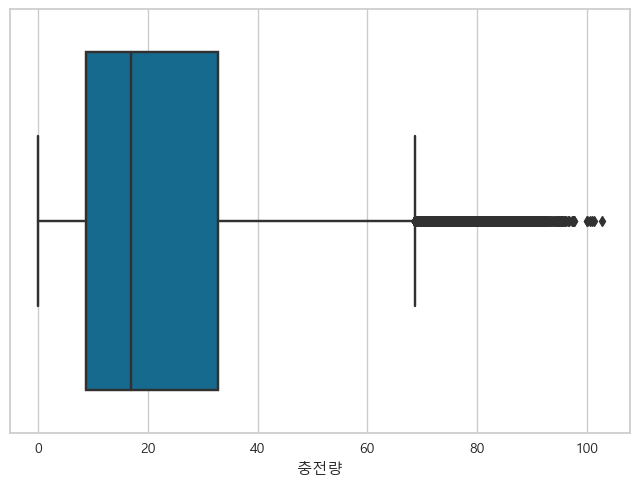

In [33]:
sns.boxplot(x = df['충전량'])

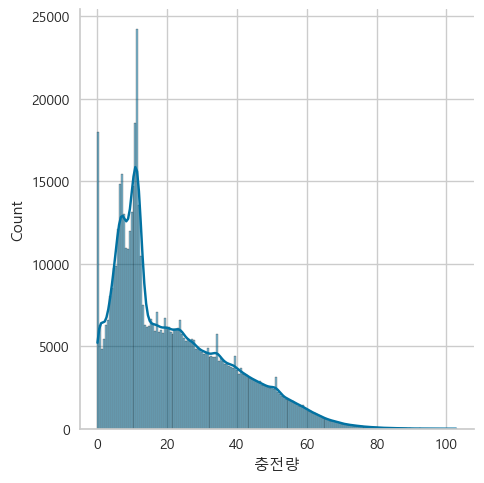

In [34]:
sns.displot(x = df['충전량'], kde = True)

outlier를 제거하고 box와 hist를 확인해보니 다음과 같이 분포가 일정해졌음을 알 수 있었음

## 충전량 추가
충전량을 100.0 = 100%로 두고 아래 식을 적용하면 "충전하기 직전에 차에 남아있던 전기량"을 추가 할 수 있다.
- 100 - 충전량= 차에 남아있던 전기량

다만 이 값과 충전량은 전기차를 소유한 사람의 심리상태 및 여러 유형의 패턴에 영향을 받기 때문에 예측모델의 columns으로 사용하기에 적합한지는 아직 판단이 안됨

In [35]:
df['현배터리양'] = 100 - df['충전량']

In [36]:
df.head(2)

,충전구분,충전소명,주소,충전기용량,충전량,충전시간,충전분,충전시작시각,충전종료시각,충전시작시각_년,...,충전종료시각_초,충전종료시각_시_초,충전종료시각_분_초,충전종료시각_시분초_초,충전시작시각_시분초,충전구분_라벨,충전소명_라벨,주소_라벨,충전기용량_라벨,현배터리양
0,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50,0.05,0,0,2021-01-01 02:06:20,2021-01-01 02:06:36,2021,...,36,7200,360,7596,20620,0,478,505,1,99.95
1,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50,13.10,0,29,2021-01-02 14:58:37,2021-01-02 15:28:25,2021,...,25,54000,1680,55705,145837,0,478,505,1,86.90


## 충전시간
완속(0)과 급속(1)의 각각의 비율은 균일.

다만 충전시간 전체를 놓고 본다면 outlier가 많이 있음을 알 수 있음.

outlier가 있는 충전시간은 별도로 값을 빼놓을 예정

<Axes: xlabel='충전구분_라벨', ylabel='충전시간'>

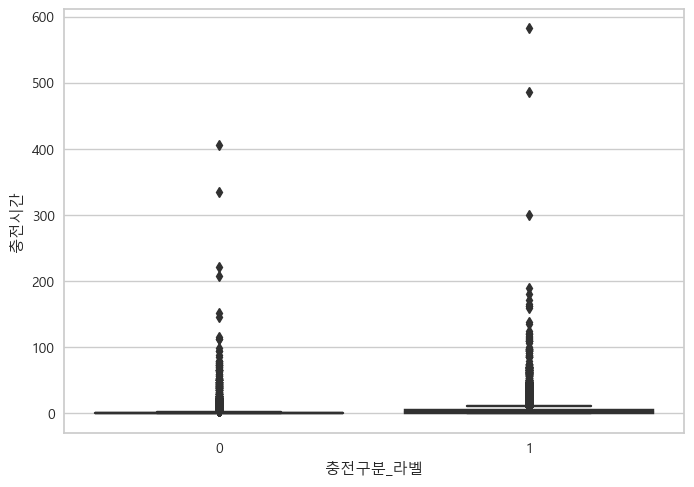

In [37]:
sns.boxplot(x = df['충전구분_라벨'], y = df['충전시간'])

완속이면서 충전시간이 14시간 이상인 경우 이상치로 판단하고 삭제

In [38]:
df.drop(df[(df['충전구분_라벨'] == 0) & (df['충전시간'] > 14)].index, inplace=True)

급속이면서 충전시간이 2시간 이상인 경우 이상치로 판단하고 삭제

In [39]:
df.drop(df[(df['충전구분_라벨'] == 1) & (df['충전시간'] > 2)].index, inplace=True)

<Axes: xlabel='충전구분_라벨', ylabel='충전시간'>

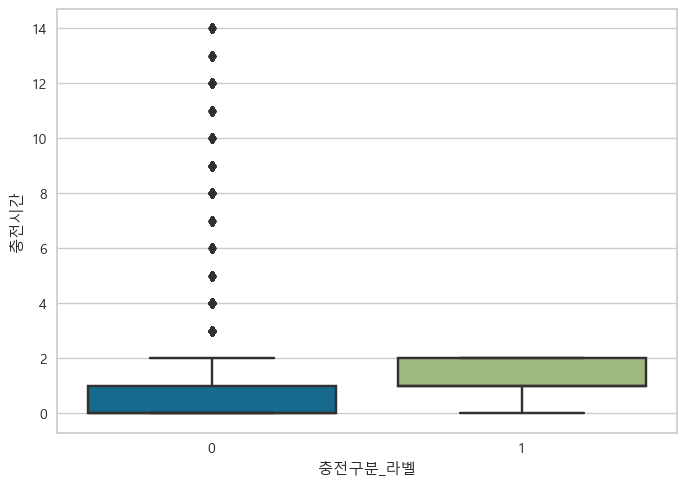

In [40]:
sns.boxplot(x = df['충전구분_라벨'], y = df['충전시간'])

완속(0)에서 2시간 ~ 14시간까지 outlier 처리하면 분포는 더욱 고르게 나타낼 수 있을 것임.

과태료 기준이 14시간 이상인 경우만 outlier로 잡아서 우선 살려둘 예정.

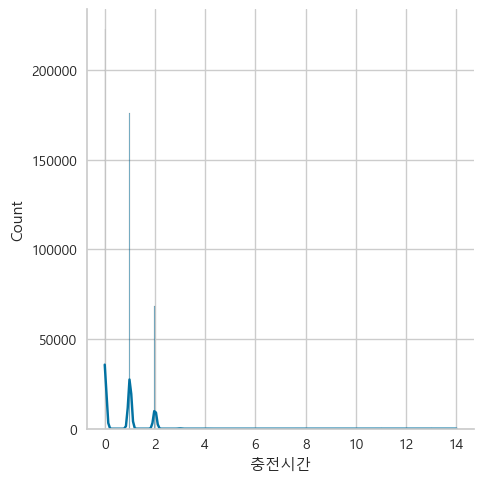

In [41]:
sns.displot(x = df['충전시간'], kde = True)

# 데이터 나누기

In [42]:
df.head()

,충전구분,충전소명,주소,충전기용량,충전량,충전시간,충전분,충전시작시각,충전종료시각,충전시작시각_년,...,충전종료시각_초,충전종료시각_시_초,충전종료시각_분_초,충전종료시각_시분초_초,충전시작시각_시분초,충전구분_라벨,충전소명_라벨,주소_라벨,충전기용량_라벨,현배터리양
0,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50,0.05,0,0,2021-01-01 02:06:20,2021-01-01 02:06:36,2021,...,36,7200,360,7596,20620,0,478,505,1,99.95
1,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50,13.10,0,29,2021-01-02 14:58:37,2021-01-02 15:28:25,2021,...,25,54000,1680,55705,145837,0,478,505,1,86.90
2,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50,47.56,1,33,2021-01-02 20:57:53,2021-01-02 22:31:46,2021,...,46,79200,1860,81106,205753,0,478,505,1,52.44
3,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50,24.77,0,38,2021-01-04 12:12:02,2021-01-04 12:51:01,2021,...,1,43200,3060,46261,121202,0,478,505,1,75.23
4,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50,19.21,0,29,2021-01-04 22:51:11,2021-01-04 23:21:04,2021,...,4,82800,1260,84064,225111,0,478,505,1,80.79


In [43]:
df.columns

Index(['충전구분', '충전소명', '주소', '충전기용량', '충전량', '충전시간', '충전분', '충전시작시각', '충전종료시각',
       '충전시작시각_년', '충전시작시각_월', '충전시작시각_일', '충전시작시각_시', '충전시작시각_분', '충전시작시각_초',
       '충전시작시각_요일', '충전종료시각_시분초', '충전종료시각_시', '충전종료시각_분', '충전종료시각_초',
       '충전종료시각_시_초', '충전종료시각_분_초', '충전종료시각_시분초_초', '충전시작시각_시분초', '충전구분_라벨',
       '충전소명_라벨', '주소_라벨', '충전기용량_라벨', '현배터리양'],
      dtype='object')

In [44]:
len(df.columns)

29

In [45]:
new_df = df[['충전량', '충전시간', '충전분','충전시작시각_년', '충전시작시각_월',
             '충전시작시각_일', '충전시작시각_시분초', '충전시작시각_요일',
             '충전종료시각_시분초', '충전구분_라벨', '충전기용량_라벨', '현배터리양','충전종료시각_시분초_초']]

In [46]:
new_df

,충전량,충전시간,충전분,충전시작시각_년,충전시작시각_월,충전시작시각_일,충전시작시각_시분초,충전시작시각_요일,충전종료시각_시분초,충전구분_라벨,충전기용량_라벨,현배터리양,충전종료시각_시분초_초
0,0.05,0,0,2021,1,1,20620,4,20636,0,1,99.95,7596
1,13.10,0,29,2021,1,2,145837,5,152825,0,1,86.90,55705
2,47.56,1,33,2021,1,2,205753,5,223146,0,1,52.44,81106
3,24.77,0,38,2021,1,4,121202,0,125101,0,1,75.23,46261
4,19.21,0,29,2021,1,4,225111,0,232104,0,1,80.79,84064
...,...,...,...,...,...,...,...,...,...,...,...,...,...
638697,41.67,1,21,2022,3,31,94433,3,110557,0,1,58.33,39957
638698,29.07,0,44,2022,3,31,121756,3,130254,0,1,70.93,46974
638699,55.65,1,21,2022,3,31,165711,3,181904,0,1,44.35,65944
638700,21.48,1,3,2022,3,31,130618,3,140920,0,1,78.52,50960


## 데이터 분포 확인

In [47]:
# sns.pairplot(new_df)

## 데이터 나누기 이어서

In [48]:
X_train = new_df[:460000]
Y_test = new_df[460001:465000]
Val1 = new_df[465001:467500]
Val2 = new_df[467500:]

In [49]:
X_train_ = new_df[:20000]
Y_test_ = new_df[20001:20500]
Val1_ = new_df[25001:25050]
Val2_ = new_df[25051:25100]

In [50]:
print(len(X_train_))
print(len(Y_test_))
print(len(Val1_))
print(len(Val2_))

20000
499
49
49


In [51]:
X_train_

,충전량,충전시간,충전분,충전시작시각_년,충전시작시각_월,충전시작시각_일,충전시작시각_시분초,충전시작시각_요일,충전종료시각_시분초,충전구분_라벨,충전기용량_라벨,현배터리양,충전종료시각_시분초_초
0,0.05,0,0,2021,1,1,20620,4,20636,0,1,99.95,7596
1,13.10,0,29,2021,1,2,145837,5,152825,0,1,86.90,55705
2,47.56,1,33,2021,1,2,205753,5,223146,0,1,52.44,81106
3,24.77,0,38,2021,1,4,121202,0,125101,0,1,75.23,46261
4,19.21,0,29,2021,1,4,225111,0,232104,0,1,80.79,84064
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27237,5.04,1,27,2021,5,20,82934,3,95655,0,1,94.96,35815
27239,42.55,1,4,2021,5,20,114828,3,125326,0,1,57.45,46406
27240,3.64,0,6,2021,5,20,223358,3,223958,0,1,96.36,81598
27243,3.90,1,36,2021,5,20,185817,3,203439,1,0,96.10,74079


# PyCaret 모델
- [Z-score](https://ko.wikipedia.org/wiki/%ED%91%9C%EC%A4%80_%EC%A0%90%EC%88%98#/media/%ED%8C%8C%EC%9D%BC:Normal_distribution_and_scales.gif)

In [52]:
reg_model = setup(session_id=7,
                  data=X_train_,
                  test_data=Y_test_,
                  target='충전종료시각_시분초_초',
                  normalize=True,
                  normalize_method='zscore', 
                  transformation=True,
                  fold_strategy='stratifiedkfold',
                  fold=5,
                  use_gpu=True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GTX 1660 SUPER, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no

,Description,Value
0,Session id,7
1,Target,충전종료시각_시분초_초
2,Target type,Regression
3,Original data shape,"(20499, 13)"
4,Transformed data shape,"(20499, 13)"
5,Transformed train set shape,"(20000, 13)"
6,Transformed test set shape,"(499, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GTX 1660 SUPER, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no

In [53]:
models()

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0


[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GTX 1660 SUPER, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] St

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [54]:
pycaret_reg_models = compare_models(n_select=13,
                                    sort='MAE',
                                    include=['lr','lasso','ridge','en','knn','dt','rf','et','ada','gbr','xgboost','lightgbm','catboost'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,4.3372,57.5246,7.5816,1.0000,0.0119,0.0008,1.0000
dt,Decision Tree Regressor,6.8393,162.2029,12.7303,1.0000,0.0103,0.0009,0.2460
et,Extra Trees Regressor,7.2969,2223.2388,42.5874,1.0000,0.0228,0.0032,0.5540
lightgbm,Light Gradient Boosting Machine,86.7732,16752.0253,129.3534,1.0000,0.0775,0.0212,0.6620
xgboost,Extreme Gradient Boosting,90.1899,18479.4324,135.8895,1.0000,0.0806,0.0233,0.4720
gbr,Gradient Boosting Regressor,122.0010,26650.6247,163.2407,0.9999,0.0569,0.0120,2.4680
catboost,CatBoost Regressor,496.1910,523975.6466,722.6148,0.9989,0.1757,0.1536,6.3980
lasso,Lasso Regression,725.1820,980460.4539,989.9782,0.9979,0.2379,0.2364,0.5320
ridge,Ridge Regression,725.2177,980165.5569,989.8345,0.9979,0.2377,0.2363,0.1720
lr,Linear Regression,725.4265,980210.0587,989.8576,0.9979,0.2374,0.2355,0.1880


In [55]:
xgb_model = create_model('xgboost')
light_model = create_model('lightgbm')
gbr_model = create_model('gbr')
cat_model = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,90.8342,19458.1443,139.4925,1.0000,0.1270,0.0516
1,89.4474,18071.1942,134.4291,1.0000,0.0651,0.0119
2,91.0250,19852.3631,140.8984,1.0000,0.0838,0.0194
3,90.3148,17748.6556,133.2241,1.0000,0.0691,0.0216
4,89.3283,17266.8048,131.4032,1.0000,0.0581,0.0121
Mean,90.1899,18479.4324,135.8895,1.0000,0.0806,0.0233
Std,0.6960,1001.3965,3.6724,0.0000,0.0247,0.0147


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,87.4538,18168.0806,134.7890,1.0000,0.1195,0.0443
1,84.0082,14767.9852,121.5236,1.0000,0.0591,0.0121
2,88.7119,17413.6064,131.9606,1.0000,0.0774,0.0168
3,87.1710,16879.8449,129.9225,1.0000,0.0702,0.0196
4,86.5804,16550.4554,128.6486,1.0000,0.0622,0.0136
Mean,86.7851,16755.9945,129.3689,1.0000,0.0777,0.0213
Std,1.5532,1134.5666,4.4378,0.0000,0.0219,0.0118


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,122.6485,26813.7338,163.7490,0.9999,0.0907,0.0228
1,120.1503,25779.4348,160.5598,0.9999,0.0400,0.0073
2,121.9087,27092.1276,164.5969,0.9999,0.0512,0.0091
3,124.0355,27347.0085,165.3693,0.9999,0.0548,0.0118
4,121.2623,26220.8188,161.9284,0.9999,0.0477,0.0089
Mean,122.0010,26650.6247,163.2407,0.9999,0.0569,0.0120
Std,1.3067,574.4884,1.7628,0.0000,0.0176,0.0056


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,510.9916,589344.7826,767.6879,0.9988,0.2271,0.2410
1,490.4189,504078.4124,709.9848,0.9989,0.1592,0.0963
2,522.0258,592235.6892,769.5685,0.9988,0.2014,0.2733
3,465.5544,430556.0024,656.1677,0.9991,0.1501,0.0936
4,495.1366,510103.2191,714.2151,0.9989,0.1411,0.0646
Mean,496.8255,525263.6211,723.5248,0.9989,0.1758,0.1538
Std,19.2744,60398.4057,42.1364,0.0001,0.0329,0.0858


In [56]:
et_model = create_model('et')
rf_model = create_model('rf')
dt_model = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,7.2643,1124.7866,33.5378,1.0000,0.0278,0.0022
1,7.5465,4284.4057,65.4554,1.0000,0.0094,0.0007
2,6.2505,395.2768,19.8816,1.0000,0.0598,0.0117
3,6.8005,674.0012,25.9615,1.0000,0.0123,0.0008
4,8.6225,4637.7237,68.1008,1.0000,0.0048,0.0006
Mean,7.2969,2223.2388,42.5874,1.0000,0.0228,0.0032
Std,0.7952,1845.3361,20.2373,0.0000,0.0200,0.0043


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.3471,56.2003,7.4967,1.0000,0.0280,0.0018
1,4.1955,53.7927,7.3344,1.0000,0.0030,0.0004
2,4.3362,55.0774,7.4214,1.0000,0.0040,0.0005
3,4.3318,60.8868,7.8030,1.0000,0.0168,0.0010
4,4.4753,61.6659,7.8528,1.0000,0.0076,0.0005
Mean,4.3372,57.5246,7.5816,1.0000,0.0119,0.0008
Std,0.0886,3.1662,0.2081,0.0000,0.0094,0.0005


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,6.7375,153.4375,12.3870,1.0000,0.0210,0.0013
1,6.8702,174.9608,13.2273,1.0000,0.0053,0.0007
2,6.9752,162.5792,12.7507,1.0000,0.0109,0.0009
3,6.7715,170.4050,13.0539,1.0000,0.0092,0.0008
4,6.8422,149.6322,12.2324,1.0000,0.0053,0.0006
Mean,6.8393,162.2029,12.7303,1.0000,0.0103,0.0009
Std,0.0830,9.6440,0.3789,0.0000,0.0058,0.0002


## Blend Model
- tree와 boosting 모델이 강세를 보이고 있어서 선택.

In [57]:
blend_models(estimator_list=[xgb_model, light_model, et_model, rf_model])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,29.4385,2142.6663,46.2889,1.0000,0.0962,0.0238
1,28.9501,1863.6225,43.1697,1.0000,0.0406,0.0053
2,30.1713,2075.5494,45.5582,1.0000,0.0658,0.0111
3,31.3155,2182.4575,46.7168,1.0000,0.0534,0.0100
4,29.6902,2033.9462,45.0993,1.0000,0.0424,0.0056
Mean,29.9131,2059.6484,45.3666,1.0000,0.0597,0.0112
Std,0.8044,110.7372,1.2336,0.0000,0.0203,0.0067


VotingRegressor(estimators=[('Extreme Gradient Boosting',
                             XGBRegressor(base_score=None, booster='gbtree',
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constr...
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=-1,
                                          num_parallel_tree=None,
                                          random_state=7, ...)),
                            ('Light Gradient Boosting Machine',
                             LGBMRegressor(device='gpu', n_jobs=-1,
                                           random_state=7)),
                            ('Extra Trees Regressor',
                             ExtraTreesRegressor(n_jobs=-1, random_state=7)),
                            ('Random Forest Regressor',
                             RandomForestRegressor(n_jobs=-1, random_state=7))],
                n_jobs=1)

# Stack Model

In [71]:
stack_models(estimator_list=[xgb_model, light_model, et_model, rf_model])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.3503,55.4953,7.4495,1.0000,0.0320,0.0023
1,4.2176,53.1041,7.2873,1.0000,0.0062,0.0005
2,4.3178,53.6311,7.3233,1.0000,0.0130,0.0008
3,4.2982,58.9270,7.6764,1.0000,0.0191,0.0011
4,4.5033,62.1717,7.8849,1.0000,0.0090,0.0006
Mean,4.3374,56.6658,7.5243,1.0000,0.0159,0.0011
Std,0.0938,3.4262,0.2260,0.0000,0.0092,0.0007


StackingRegressor(cv=5,
                  estimators=[('Extreme Gradient Boosting',
                               XGBRegressor(base_score=None, booster='gbtree',
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction...
                                            n_estimators=None, n_jobs=-1,
                                            num_parallel_tree=None,
                                            random_state=7, ...)),
                              ('Light Gradient Boosting Machine',
                               LGBMRegressor(device='gpu', n_jobs=-1,
                                             random_state=7)),
                              ('Extra Trees Regressor',
                               ExtraTreesRegressor(n_jobs=-1, random_state=7)),
                              ('Random Forest Regressor',
                               RandomForestRegressor(n_jobs=-1,
                                                     random_state=7))],
                  final_estimator=LinearRegression(n_jobs=-1), n_jobs=1,
                  passthrough=True)

- blend 된 모델에 성능이 좋은 상위 5개의 모델을 선택해서 입력.

In [58]:
best_model = compare_models(n_select=5)
blender = blend_models(best_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dt,Decision Tree Regressor,6.8393,162.2029,12.7303,1.0000,0.0103,0.0009,0.2500
et,Extra Trees Regressor,7.2969,2223.2388,42.5874,1.0000,0.0228,0.0032,0.5580
rf,Random Forest Regressor,4.3372,57.5246,7.5816,1.0000,0.0119,0.0008,0.9520
lightgbm,Light Gradient Boosting Machine,86.8578,16771.4236,129.4271,1.0000,0.0778,0.0213,0.6320
xgboost,Extreme Gradient Boosting,90.1899,18479.4324,135.8895,1.0000,0.0806,0.0233,0.5000
gbr,Gradient Boosting Regressor,122.0010,26650.6247,163.2407,0.9999,0.0569,0.0120,2.3920
catboost,CatBoost Regressor,496.2198,523950.0518,722.5967,0.9989,0.1757,0.1536,6.4080
lar,Least Angle Regression,725.3397,980163.8121,989.8340,0.9979,0.2374,0.2355,0.1800
br,Bayesian Ridge,725.3374,980163.8063,989.8340,0.9979,0.2374,0.2356,0.1800
llar,Lasso Least Angle Regression,725.1987,980368.7410,989.9328,0.9979,0.2379,0.2365,0.1780


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,23.6881,1378.6847,37.1306,1.0000,0.0884,0.0190
1,23.1721,1189.8760,34.4946,1.0000,0.0363,0.0042
2,24.1850,1339.3005,36.5965,1.0000,0.0597,0.0088
3,25.0649,1411.0672,37.5642,1.0000,0.0492,0.0079
4,23.7940,1307.2873,36.1564,1.0000,0.0378,0.0045
Mean,23.9808,1325.2431,36.3885,1.0000,0.0543,0.0089
Std,0.6311,76.2444,1.0599,0.0000,0.0190,0.0054


In [72]:
stacker = stack_models(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.2958,54.7510,7.3994,1.0000,0.0313,0.0023
1,4.1869,53.4647,7.3120,1.0000,0.0063,0.0005
2,4.2816,52.9460,7.2764,1.0000,0.0133,0.0008
3,4.2347,57.2830,7.5686,1.0000,0.0184,0.0010
4,4.4021,61.2001,7.8230,1.0000,0.0085,0.0006
Mean,4.2802,55.9289,7.4759,1.0000,0.0156,0.0010
Std,0.0720,3.0324,0.2008,0.0000,0.0089,0.0006


stratedkfold와 cross validation을 5번 진행

# Prediction
- finalize model을 사용하면 cross validataion을 사용하여 적합한 모델을 전체 데이터로 마지막 학습을 할 수 있음

In [59]:
final_model = finalize_model(blender)
prediction1 = predict_model(final_model, data = Val1_)
prediction2 = predict_model(final_model, data = Val2_)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,26.2698,1171.9489,34.2337,1.0000,0.0059,0.0016


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,22.3283,1169.7671,34.2019,1.0000,0.0020,0.0009


In [74]:
final_model_ = finalize_model(stacker)
prediction1_ = predict_model(final_model_, data = Val1_)
prediction2_ = predict_model(final_model_, data = Val2_)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,3.4803,62.9250,7.9325,1.0000,0.0006,0.0002


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,3.4321,56.3648,7.5076,1.0000,0.0005,0.0002



충전종료시각을 시분초로 넣었지만 모델이 예측한 값은 시분초로 나온 것이 아님

시분초를 초로 변환해서 넣었음.

### Validation 1 결과 확인 (blender)

In [60]:
prediction1[prediction1.columns[12:]].tail()

,충전종료시각_시분초_초,prediction_label
34303,76408,76362.066127
34304,56004,56014.011704
34306,76210,76244.686439
34307,63526,63536.090803
34309,70508,70528.827115


### Validation 2 결과 확인 (blender)

In [61]:
prediction2[prediction2.columns[12:]].tail()

,충전종료시각_시분초_초,prediction_label
34374,76612,76582.387723
34375,76492,76460.738626
34376,4197,4175.571303
34377,54212,54217.933370
34379,63137,63112.125811


---

### Validation 1 결과 확인 (stacker)

In [75]:
prediction1_[prediction1_.columns[12:]].tail()

,충전종료시각_시분초_초,prediction_label
34303,76408,76409.934916
34304,56004,56005.161256
34306,76210,76210.169496
34307,63526,63528.769124
34309,70508,70509.085444


### Validation 2 결과 확인 (stacker)

In [76]:
prediction2_[prediction2_.columns[12:]].tail()

,충전종료시각_시분초_초,prediction_label
34374,76612,76611.918910
34375,76492,76485.798962
34376,4197,4196.153069
34377,54212,54212.397588
34379,63137,63136.192245


### 실제 정답(Y)과 예측 정답(Y hat)의 차이 (Validation 1)

In [62]:
prediction1['실제정답-예측정답'] = prediction1['충전종료시각_시분초_초'] - prediction1['prediction_label']
prediction1[prediction1.columns[12:]].head()

,충전종료시각_시분초_초,prediction_label,실제정답-예측정답
34246,30842,30800.148872,41.851128
34248,45640,45669.746885,-29.746885
34249,38268,38252.733059,15.266941
34250,44493,44504.023117,-11.023117
34251,49937,49903.165670,33.834330


### 실제 정답(Y)과 예측 정답(Y hat)의 차이 (Validation 2)

In [63]:
prediction2['실제정답-예측정답'] = prediction2['충전종료시각_시분초_초'] - prediction2['prediction_label']
prediction2[prediction2.columns[12:]].head()

,충전종료시각_시분초_초,prediction_label,실제정답-예측정답
34312,68725,68716.343433,8.656567
34314,66465,66455.691676,9.308324
34316,86136,86156.804813,-20.804813
34317,59211,59174.611260,36.388740
34318,72370,72388.708342,-18.708342


---

## stacker

In [78]:
prediction1_['실제정답-예측정답'] = prediction1_['충전종료시각_시분초_초'] - prediction1_['prediction_label']
prediction1_[prediction1_.columns[12:]].head()

,충전종료시각_시분초_초,prediction_label,실제정답-예측정답
34246,30842,30854.343026,-12.343026
34248,45640,45638.737722,1.262278
34249,38268,38266.803022,1.196978
34250,44493,44492.256058,0.743942
34251,49937,49932.184386,4.815614


In [79]:
prediction2_['실제정답-예측정답'] = prediction2_['충전종료시각_시분초_초'] - prediction2_['prediction_label']
prediction2_[prediction2_.columns[12:]].head()

,충전종료시각_시분초_초,prediction_label,실제정답-예측정답
34312,68725,68725.672576,-0.672576
34314,66465,66466.496340,-1.496340
34316,86136,86138.038124,-2.038124
34317,59211,59210.216868,0.783132
34318,72370,72370.423006,-0.423006


### 통계결과 확인

In [64]:
prediction1.describe()

,충전량,충전시간,충전분,충전시작시각_년,충전시작시각_월,충전시작시각_일,충전시작시각_시분초,충전시작시각_요일,충전종료시각_시분초,충전구분_라벨,충전기용량_라벨,현배터리양,충전종료시각_시분초_초,prediction_label,실제정답-예측정답
count,49.000000,49.000000,49.000000,49.0,49.0,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,18.808775,0.836735,32.448980,2021.0,6.0,22.959184,140800.326531,1.959184,144871.061224,0.448980,0.551020,81.191223,52843.306122,52841.324791,1.981332
std,14.505123,0.773168,17.801055,0.0,0.0,0.199915,53079.239317,0.199915,57361.232937,0.502545,0.502545,14.505123,20605.429449,20601.632650,34.530523
min,0.100000,0.000000,1.000000,2021.0,6.0,22.000000,15709.000000,1.000000,3314.000000,0.000000,0.000000,35.669998,1994.000000,1915.824561,-82.871900
25%,9.800000,0.000000,19.000000,2021.0,6.0,23.000000,110313.000000,2.000000,120931.000000,0.000000,0.000000,72.879997,43771.000000,43807.510353,-18.644685
50%,13.500000,1.000000,36.000000,2021.0,6.0,23.000000,140425.000000,2.000000,140436.000000,0.000000,1.000000,86.500000,50676.000000,50692.597421,-2.415776
75%,27.120001,1.000000,47.000000,2021.0,6.0,23.000000,184711.000000,2.000000,191829.000000,1.000000,1.000000,90.199997,69509.000000,69490.966487,20.930400
max,64.330002,3.000000,59.000000,2021.0,6.0,23.000000,231552.000000,2.000000,234712.000000,1.000000,1.000000,99.900002,85632.000000,85588.964190,87.571498


# Visualization

In [65]:
evaluate_model(final_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [80]:
evaluate_model(final_model_)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### Residuals
- x축은 예측된 값 / y축은 잔차
- 상위 5개의 모델과 블렌드(4-voting) 모델을 비교하였는데 블렌드 모델이 더 잘 맞추고 있음.

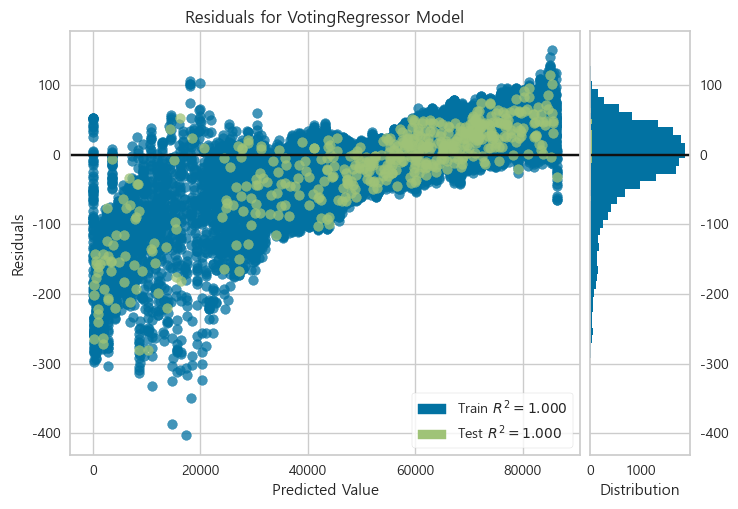

In [66]:
plot_model(final_model, plot = 'residuals')

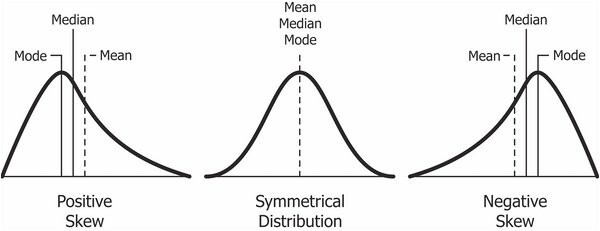

- Positive Skewness는 오른쪽 꼬리가 왼쪽보다 더 길 때 
- 평균(Mean)과 중위수(Median)가 최빈값(Mode)보다 크다.

---

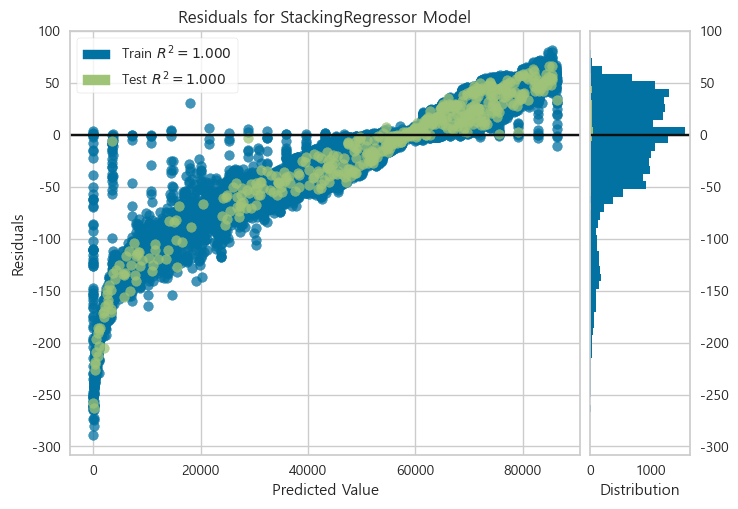

In [81]:
plot_model(final_model_, plot = 'residuals')

### Cooks Distance plot
- 빨간 점선을 기준으로 벗어난 것을 outlier로 인식. 
    + 분포에서 많이 벗어난 값은 outlier로 인식하면 될 것 같음.
- x축은 데이터셋의 각 관측치 값들에 대한 index
- 데이터를 전처리할 때 완속은 14시간 기준 / 급속은 2시간 기준으로 잘랐었는데 실제로는 사람들이 기준을 잘 지켜서 충전을 하기 때문에 완속과 급속의 최대 충전 시간 기준을 더 줄여서 결과를 확인해도 좋을 것 같음.

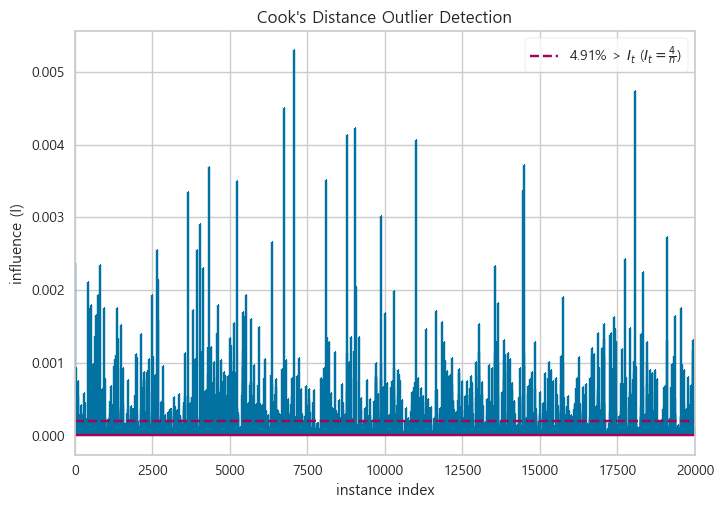

In [67]:
# functional API
plot_model(final_model, plot = 'cooks')

### R^2 socre 
- x축은 y(실제정답) y축은 y_hat(예측한정답)으로 정답을 아주 잘 맞추고 있다는 것을 알 수 있음
- blend model(Voting)의 y - y_hat이 거의 0에 수렴하고 있음.

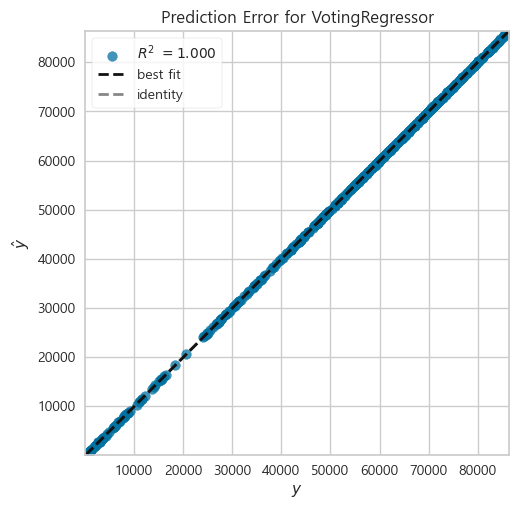

In [68]:
plot_model(final_model, plot = 'error')

### Learning Curve
- training score가 100%에 가까웠지만 Cross validation socre는 70-73% 사이의 정확도를 보여주고 있음

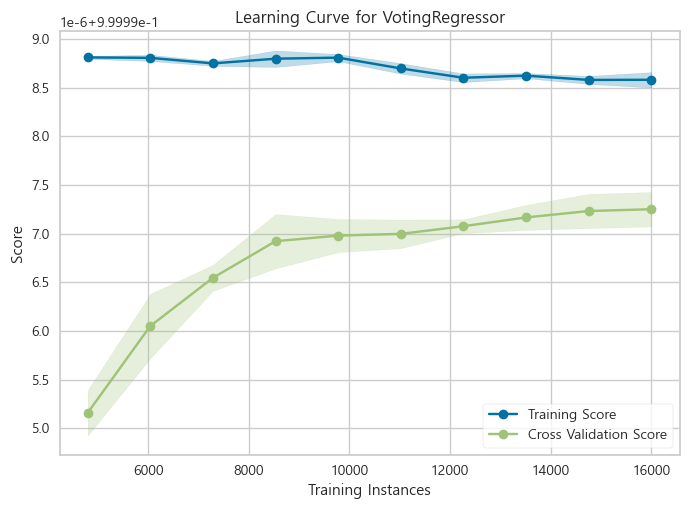

In [69]:
plot_model(final_model, plot = 'learning')

### t-SNE
- 11차원 데이터를 2차원으로 축소하여 보여줌. 11개의 feature가 2차원 평면도 안에 어떻게 분포되어있는지 확인할 수 있음.
- 각 feature별 값들의 군집(cluster)를 확인할 수 있음.

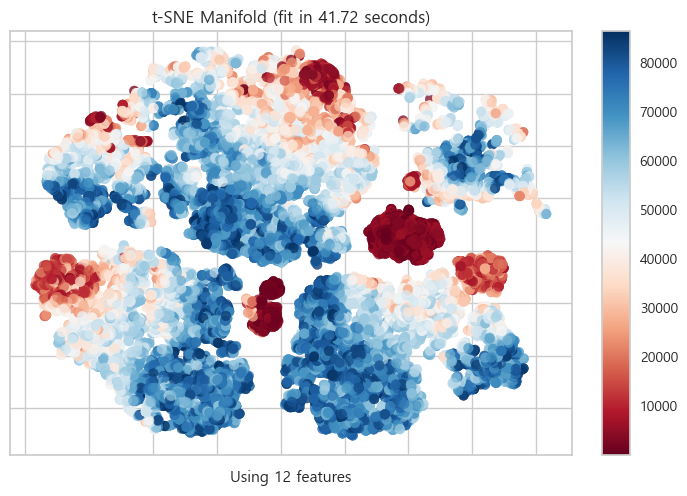

In [70]:
plot_model(final_model, plot = 'manifold')

## 추가로 더 시도 해볼만한 점
1. 각 feature 마다 다양한 plot을 시각화 해보기
    - feature별 분포 확인하기
2. 초로 변환된 값을 다시 시분초로 변환해서 직관적으로 표현하기
3. Cooks Distance plot에 나타나는 outlier를 찾아서 제거하기
4. t-SNE에서 형성하고 있는 군집들이 어떤 연관이 있는지 값을 확인해보기

## 추가
1. 배터리 충전 유형 분석하고 모델에 적용하기
2. 전국 충전량 데이터를 활용해서 모델을 만들고 비교해보고 성능이 잘나오는지 테스트해보기